# 🏡 **PROJECT 3 - HDB PRICES LINEAR REGRESSION** 🏡



# *Part 1: Data Cleaning*


---



In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("../datasets/train.csv")
train_df.head()

C:\Users\Serene\AppData\Local\Temp\ipykernel_18232\1403039525.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("../datasets/train.csv")


id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  ...  vacancy  \
0     10 TO 12            90.0     Model A                 2006  ...       78   
1     07 TO 09           130.0    Improved                 1987  ...       45   
2     13 TO 15           144.0   Apartment                 1997  ...       39   
3     01 TO 05           103.0     Model A                 1992  ...       20   
4     01 TO 03            83.0  Simplified                 1987  ...       74   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    1          1.317659         103.882504   
1                    1          1.349783         103.854529   
2                    0          1.345245         103.756265   
3                    1          1.354789         103.844934   
4                    0          1.416280         103.838798   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   
2            180.074558             Yusof Ishak Secondary School   
3            389.515528                     Catholic High School   
4            312.025435             Orchid Park Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224           0         1.317659         103.882504  
1           232           0         1.350110         103.854892  
2           188           0         1.342334         103.760013  
3           253           1         1.354789         103.844934  
4           208           0         1.414888         103.838335  

[5 rows x 78 columns]

In [3]:
# explore the number of rows and columns
train_df.shape

(150634, 78)

<span style="color:purple;">Total of 150634 rows and 78 columns</span>



In [4]:
# check and drop duplicates
train_df = train_df.drop_duplicates()
train_df

id Tranc_YearMonth             town         flat_type block  \
0        88471         2016-05  KALLANG/WHAMPOA            4 ROOM    3B   
1       122598         2012-07           BISHAN            5 ROOM   153   
2       170897         2013-07      BUKIT BATOK         EXECUTIVE  289B   
3        86070         2012-04           BISHAN            4 ROOM   232   
4       153632         2017-12           YISHUN            4 ROOM   876   
...        ...             ...              ...               ...   ...   
150629   39814         2020-09        WOODLANDS         EXECUTIVE   849   
150630  147177         2017-06      JURONG WEST            5 ROOM  648D   
150631  179087         2020-12            BEDOK         EXECUTIVE   639   
150632   21309         2016-05       QUEENSTOWN            3 ROOM    32   
150633  185947         2018-06           YISHUN  MULTI-GENERATION   666   

               street_name storey_range  floor_area_sqm        flat_model  \
0         UPP BOON KENG RD     10 TO 12            90.0           Model A   
1             BISHAN ST 13     07 TO 09           130.0          Improved   
2           BT BATOK ST 25     13 TO 15           144.0         Apartment   
3             BISHAN ST 22     01 TO 05           103.0           Model A   
4             YISHUN ST 81     01 TO 03            83.0        Simplified   
...                    ...          ...             ...               ...   
150629     WOODLANDS ST 82     04 TO 06           161.0         Apartment   
150630   JURONG WEST ST 61     04 TO 06           110.0          Improved   
150631  BEDOK RESERVOIR RD     10 TO 12           144.0         Apartment   
150632          HOLLAND CL     07 TO 09            59.0          Improved   
150633        YISHUN AVE 4     07 TO 09           164.0  Multi Generation   

        lease_commence_date  ...  vacancy  pri_sch_affiliation  \
0                      2006  ...       78                    1   
1                      1987  ...       45                    1   
2                      1997  ...       39                    0   
3                      1992  ...       20                    1   
4                      1987  ...       74                    0   
...                     ...  ...      ...                  ...   
150629                 1995  ...       43                    0   
150630                 2001  ...       45                    0   
150631                 1993  ...       43                    1   
150632                 1974  ...       82                    0   
150633                 1987  ...       53                    0   

        pri_sch_latitude  pri_sch_longitude  sec_sch_nearest_dist  \
0               1.317659         103.882504           1138.633422   
1               1.349783         103.854529            447.894399   
2               1.345245         103.756265            180.074558   
3               1.354789         103.844934            389.515528   
4               1.416280         103.838798            312.025435   
...                  ...                ...                   ...   
150629          1.444148         103.794545            189.889876   
150630          1.339244         103.698896            614.418470   
150631          1.328471         103.901299            556.889910   
150632          1.299811         103.799965            832.386515   
150633          1.421304         103.840793            552.426214   

                                   sec_sch_name  cutoff_point affiliation  \
0                      Geylang Methodist School           224           0   
1       Kuo Chuan Presbyterian Secondary School           232           0   
2                  Yusof Ishak Secondary School           188           0   
3                          Catholic High School           253           1   
4                  Orchid Park Secondary School           208           0   
...                                         ...           ...         ...   
150629               Ever

<span style="color:purple;">No duplicates found.</span>


In [5]:
# drop unused columns that we will remove
train_modified_df = train_df.drop(["Tranc_YearMonth", "block", "address", "street_name", "residential",
                         "multistorey_carpark", "precinct_pavilion", "postal", "hawker_food_stalls",
                         "mrt_name", "bus_stop_name", "affiliation", "floor_area_sqm", "full_flat_type",
                         "price_per_sqft", "vacancy", "mid_storey", "lower", "upper", "mid",
                         "max_floor_lvl", "year_completed", "1room_sold", "2room_sold",
                         "3room_sold", "4room_sold", "5room_sold", "exec_sold", "multigen_sold",
                         "studio_apartment_sold", "1room_rental", "2room_rental", "3room_rental",
                         "other_room_rental"], axis=1)
train_modified_df

id             town         flat_type storey_range  \
0        88471  KALLANG/WHAMPOA            4 ROOM     10 TO 12   
1       122598           BISHAN            5 ROOM     07 TO 09   
2       170897      BUKIT BATOK         EXECUTIVE     13 TO 15   
3        86070           BISHAN            4 ROOM     01 TO 05   
4       153632           YISHUN            4 ROOM     01 TO 03   
...        ...              ...               ...          ...   
150629   39814        WOODLANDS         EXECUTIVE     04 TO 06   
150630  147177      JURONG WEST            5 ROOM     04 TO 06   
150631  179087            BEDOK         EXECUTIVE     10 TO 12   
150632   21309       QUEENSTOWN            3 ROOM     07 TO 09   
150633  185947           YISHUN  MULTI-GENERATION     07 TO 09   

              flat_model  lease_commence_date  resale_price  Tranc_Year  \
0                Model A                 2006      680000.0        2016   
1               Improved                 1987      665000.0        2012   
2              Apartment                 1997      838000.0        2013   
3                Model A                 1992      550000.0        2012   
4             Simplified                 1987      298000.0        2017   
...                  ...                  ...           ...         ...   
150629         Apartment                 1995      625000.0        2020   
150630          Improved                 2001      455000.0        2017   
150631         Apartment                 1993      733000.0        2020   
150632          Improved                 1974      338000.0        2016   
150633  Multi Generation                 1987      765000.0        2018   

        Tranc_Month  floor_area_sqft  ...  pri_sch_nearest_distance  \
0                 5          968.760  ...               1138.633422   
1                 7         1399.320  ...                415.607357   
2                 7         1550.016  ...                498.849039   
3                 4         1108.692  ...                389.515528   
4                12          893.412  ...                401.200584   
...             ...              ...  ...                       ...   
150629            9         1733.004  ...                418.983965   
150630            6         1184.040  ...                136.298080   
150631           12         1550.016  ...                512.626814   
150632            5          635.076  ...                787.250957   
150633            6         1765.296  ...                212.567991   

                                 pri_sch_name pri_sch_affiliation  \
0                    Geylang Methodist School                   1   
1       Kuo Chuan Presbyterian Primary School                   1   
2                       Keming Primary School                   0   
3                        Catholic High School                   1   
4                   Naval Base Primary School                   0   
...                                       ...                 ...   
150629               Evergreen Primary School                   0   
150630             Jurong West Primary School                   0   
150631                      Maha Bodhi School                   1   
150632                New Town Primary School                   0   
150633               Northland Primary School                   0   

        pri_sch_latitude  pri_sch_longitude  sec_sch_nearest_dist  \
0               1.317659         103.882504           1138.633422   
1               1.349783         103.854529            447.894399   
2               1.345245         103.756265            180.074558   
3               1.354789         103.844934            389.515528   
4               1.416280         103.838798            312.025435   
...                  ...                ...                   ...   
150629          1.444148         103.794545            189.889876   
150630          1.339244         103.698896            614.418470   
150631         

In [6]:
# check for data types
print(train_modified_df.dtypes)

id                             int64
town                          object
flat_type                     object
storey_range                  object
flat_model                    object
lease_commence_date            int64
resale_price                 float64
Tranc_Year                     int64
Tranc_Month                    int64
floor_area_sqft              float64
hdb_age                        int64
commercial                    object
market_hawker                 object
total_dwelling_units           int64
Latitude                     float64
Longitude                    float64
planning_area                 object
Mall_Nearest_Distance        float64
Mall_Within_500m             float64
Mall_Within_1km              float64
Mall_Within_2km              float64
Hawker_Nearest_Distance      float64
Hawker_Within_500m           float64
Hawker_Within_1km            float64
Hawker_Within_2km            float64
hawker_market_stalls           int64
mrt_nearest_distance         float64
b

<span style="color:purple;">Distance related columns such as Mall_Within_500m, Hawker_Within_500m should be integer instead of float but due to missing null values, float is showing by default. For now, no change required. All data types are correct. </span>


In [7]:
# check for nulls
train_modified_df.isnull().sum()

id                               0
town                             0
flat_type                        0
storey_range                     0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
floor_area_sqft                  0
hdb_age                          0
commercial                       0
market_hawker                    0
total_dwelling_units             0
Latitude                         0
Longitude                        0
planning_area                    0
Mall_Nearest_Distance          829
Mall_Within_500m             92789
Mall_Within_1km              25426
Mall_Within_2km               1940
Hawker_Nearest_Distance          0
Hawker_Within_500m           97390
Hawker_Within_1km            60868
Hawker_Within_2km            29202
hawker_market_stalls             0
mrt_nearest_distance             0
bus_interchange                  0
mrt_interchange     

<span style="color:purple;"> Total of 7 columns with missing null values - "Mall_Nearest_Distance", "Mall_Within_500m", "Mall_Within_1km", "Mall_Within_2km", "Hawker_Within_500m", "Hawker_Within_1km", "Hawker_Within_2km".</span>

In [8]:
train_modified_df["Mall_Nearest_Distance"].fillna("Unknown", inplace=True)


C:\Users\Serene\AppData\Local\Temp\ipykernel_18232\47536356.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_modified_df["Mall_Nearest_Distance"].fillna("Unknown", inplace=True)
C:\Users\Serene\AppData\Local\Temp\ipykernel_18232\47536356.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_modified_df["Mall_Nearest_Distance"].fillna(

<span style="color:purple;"> Missing values in the "Mall_Near_Distance" column were replaced with "Unknown" instead of being removed, as they are not data errors but represent flats that genuinely have no malls within a measurable distance.</span>

In [9]:
train_modified_df["Mall_Within_500m"].fillna(0, inplace=True)
train_modified_df["Mall_Within_1km"].fillna(0, inplace=True)
train_modified_df["Mall_Within_2km"].fillna(0, inplace=True)
train_modified_df["Hawker_Within_500m"].fillna(0, inplace=True)
train_modified_df["Hawker_Within_1km"].fillna(0, inplace=True)
train_modified_df["Hawker_Within_2km"].fillna(0, inplace=True)


C:\Users\Serene\AppData\Local\Temp\ipykernel_18232\1386446413.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_modified_df["Mall_Within_500m"].fillna(0, inplace=True)
C:\Users\Serene\AppData\Local\Temp\ipykernel_18232\1386446413.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

<span style="color:purple;">Null values in distance-based columns, including Mall_Within_500m and Hawker_Within_500m, were imputed with 0, as missing entries signify the absence of a mall or hawker centre within the defined distance.</span>

In [10]:
# double check that all null values have been handled and there are no more null values
train_modified_df.isnull().sum()

id                           0
town                         0
flat_type                    0
storey_range                 0
flat_model                   0
lease_commence_date          0
resale_price                 0
Tranc_Year                   0
Tranc_Month                  0
floor_area_sqft              0
hdb_age                      0
commercial                   0
market_hawker                0
total_dwelling_units         0
Latitude                     0
Longitude                    0
planning_area                0
Mall_Nearest_Distance        0
Mall_Within_500m             0
Mall_Within_1km              0
Mall_Within_2km              0
Hawker_Nearest_Distance      0
Hawker_Within_500m           0
Hawker_Within_1km            0
Hawker_Within_2km            0
hawker_market_stalls         0
mrt_nearest_distance         0
bus_interchange              0
mrt_interchange              0
mrt_latitude                 0
mrt_longitude                0
bus_stop_nearest_distance    0
bus_stop

In [11]:
# save the cleaned file to csv
train_modified_df.to_csv("train_cleaned.csv")

# *Part 2: Exploratory Data Analysis (EDA)*

---



In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [13]:
# load the cleaned file
HDB = pd.read_csv("train_cleaned.csv")

##   **Categorical column analysis**

In [14]:
# Define categorical columns to analyze
cat_cols = [
     "town", "planning_area", "Tranc_Year", "Tranc_Month",
    "mrt_interchange", "bus_interchange", "commercial", "market_hawker",
    "pri_sch_name",
    "pri_sch_affiliation",
    "sec_sch_name",
    "flat_type",
    "flat_model",
    "storey_range"]

<span style="color:purple;">To decide which categorical column to include in our modelling, we measure the feature importance to show how much each feature contributes to predicting the target variable. Random Forest Regressor is used to generate the importance score of each categorical feature. The higher the score, the greater its impact on the model’s accuracy.</span>

In [15]:

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [16]:
#Determine the importance score of our categorical columns.
# Encode categorical columns
HDB_encoded = HDB.copy()
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    HDB_encoded[col] = le.fit_transform(HDB[col])
    le_dict[col] = le

# Define features and target
X = HDB_encoded[cat_cols]
y = HDB_encoded['resale_price']  # Replace with your actual target

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importance = pd.Series(model.feature_importances_, index=cat_cols)
importance = importance.sort_values(ascending=False)

# Print importances
print("Feature importances:")
print(importance)

Feature importances:
flat_type              0.447139
planning_area          0.111178
storey_range           0.109686
flat_model             0.080047
town                   0.064155
sec_sch_name           0.061512
pri_sch_name           0.044056
Tranc_Year             0.035575
Tranc_Month            0.016076
bus_interchange        0.013632
mrt_interchange        0.009540
commercial             0.003735
pri_sch_affiliation    0.003661
market_hawker          0.000007
dtype: float64


<span style="color:purple;">Features with an importance score of ≥ 0.05 (5%) are generally considered influential for model accuracy. Therefore, we will filter out and exclude features with importance scores below 5%, retaining only the more significant ones.</span>

In [17]:
# Filter categorical columns with feature importance >= 5%
threshold = 0.05
cat_cols_shortlist = importance[importance >= threshold].index.tolist()

print("=== Categorical columns with ≥ 5% importance ===")
print(cat_cols_shortlist)

=== Categorical columns with ≥ 5% importance ===
['flat_type', 'planning_area', 'storey_range', 'flat_model', 'town', 'sec_sch_name']


### *Outlier analysis for shortlisted categorical features*


=== FLAT_TYPE ===
       flat_type  Count  Percentage
          4 ROOM  61136      40.586
          3 ROOM  39060      25.930
          5 ROOM  36415      24.174
       EXECUTIVE  11989       7.959
          2 ROOM   1896       1.259
          1 ROOM     82       0.054
MULTI-GENERATION     56       0.037

⚠️ Rare categories (<0.5% of rows):
       flat_type  Count  Percentage
          1 ROOM     82       0.054
MULTI-GENERATION     56       0.037


C:\Users\Serene\AppData\Local\Temp\ipykernel_18232\3061889228.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=freq_df[col], x=freq_df["Count"], orient="h", palette="crest")


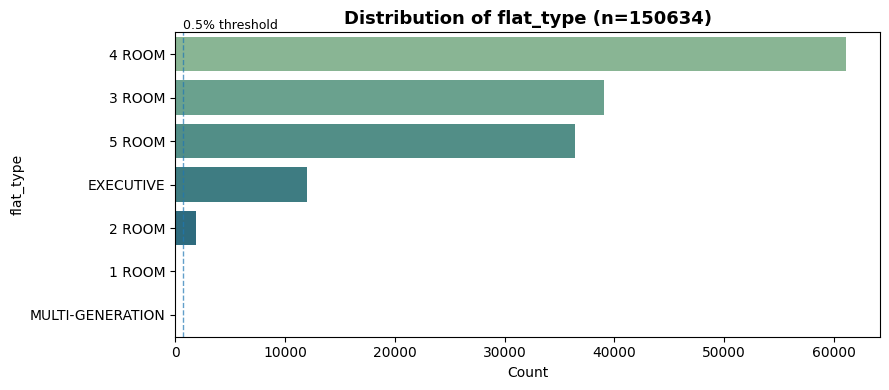


=== PLANNING_AREA ===
          planning_area  Count  Percentage
            Jurong West  11451       7.602
              Woodlands  11334       7.524
               Sengkang  11069       7.348
               Tampines  10506       6.975
                 Yishun  10042       6.666
                  Bedok   9062       6.016
                Punggol   7793       5.173
                Hougang   7557       5.017
             Ang Mo Kio   6908       4.586
          Choa Chu Kang   6328       4.201
            Bukit Merah   5854       3.886
            Bukit Batok   5700       3.784
          Bukit Panjang   5686       3.775
              Toa Payoh   4817       3.198
              Pasir Ris   4725       3.137
             Queenstown   4103       2.724
                Geylang   3986       2.646
              Sembawang   3723       2.472
               Clementi   3633       2.412
            Jurong East   3470       2.304
                Kallang   3163       2.100
              Serangoon   3121 

C:\Users\Serene\AppData\Local\Temp\ipykernel_18232\3061889228.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=freq_df[col], x=freq_df["Count"], orient="h", palette="crest")


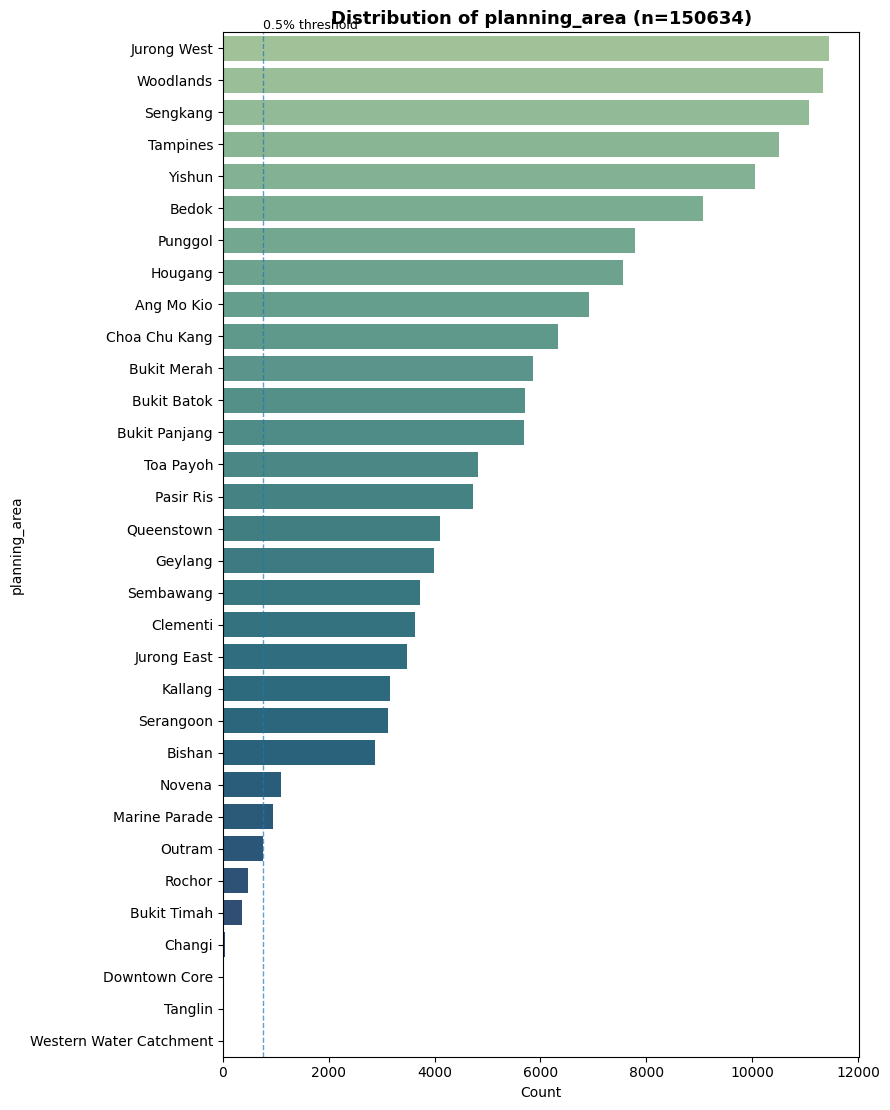


=== STOREY_RANGE ===
storey_range  Count  Percentage
    04 TO 06  34699      23.035
    07 TO 09  31119      20.659
    01 TO 03  27592      18.317
    10 TO 12  27189      18.050
    13 TO 15  12553       8.333
    16 TO 18   5549       3.684
    19 TO 21   2387       1.585
    01 TO 05   2168       1.439
    06 TO 10   1985       1.318
    22 TO 24   1695       1.125
    11 TO 15   1008       0.669
    25 TO 27    912       0.605
    28 TO 30    566       0.376
    31 TO 33    247       0.164
    34 TO 36    246       0.163
    37 TO 39    226       0.150
    16 TO 20    212       0.141
    40 TO 42    108       0.072
    21 TO 25     82       0.054
    26 TO 30     29       0.019
    46 TO 48     24       0.016
    43 TO 45     21       0.014
    49 TO 51     10       0.007
    36 TO 40      5       0.003
    31 TO 35      2       0.001

⚠️ Rare categories (<0.5% of rows):
storey_range  Count  Percentage
    28 TO 30    566       0.376
    31 TO 33    247       0.164
    34 TO 36 

C:\Users\Serene\AppData\Local\Temp\ipykernel_18232\3061889228.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=freq_df[col], x=freq_df["Count"], orient="h", palette="crest")


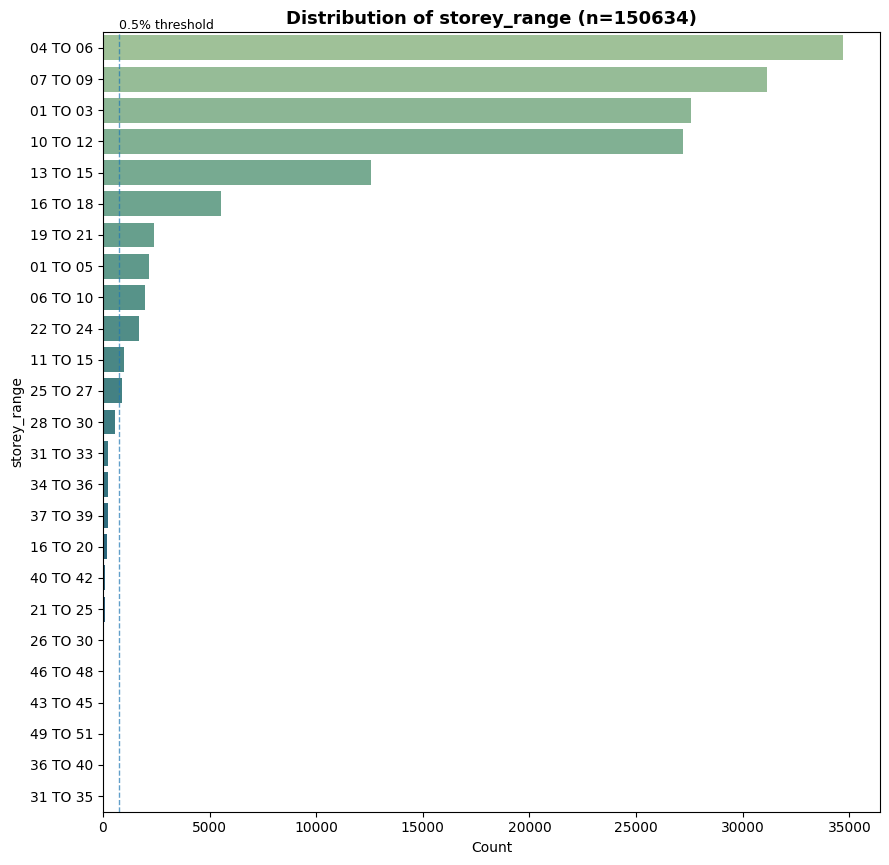


=== FLAT_MODEL ===
            flat_model  Count  Percentage
               Model A  46261      30.711
              Improved  38514      25.568
        New Generation  23366      15.512
     Premium Apartment  15091      10.018
            Simplified   7239       4.806
             Apartment   6080       4.036
              Standard   4867       3.231
            Maisonette   4364       2.897
              Model A2   2064       1.370
                  DBSS   1658       1.101
    Model A-Maisonette    262       0.174
         Adjoined flat    260       0.173
               Type S1    242       0.161
               Type S2    127       0.084
               Terrace     95       0.063
      Multi Generation     56       0.037
Premium Apartment Loft     50       0.033
   Improved-Maisonette     19       0.013
    Premium Maisonette     15       0.010
                2-room      4       0.003

⚠️ Rare categories (<0.5% of rows):
            flat_model  Count  Percentage
    Model A-Maisone

C:\Users\Serene\AppData\Local\Temp\ipykernel_18232\3061889228.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=freq_df[col], x=freq_df["Count"], orient="h", palette="crest")


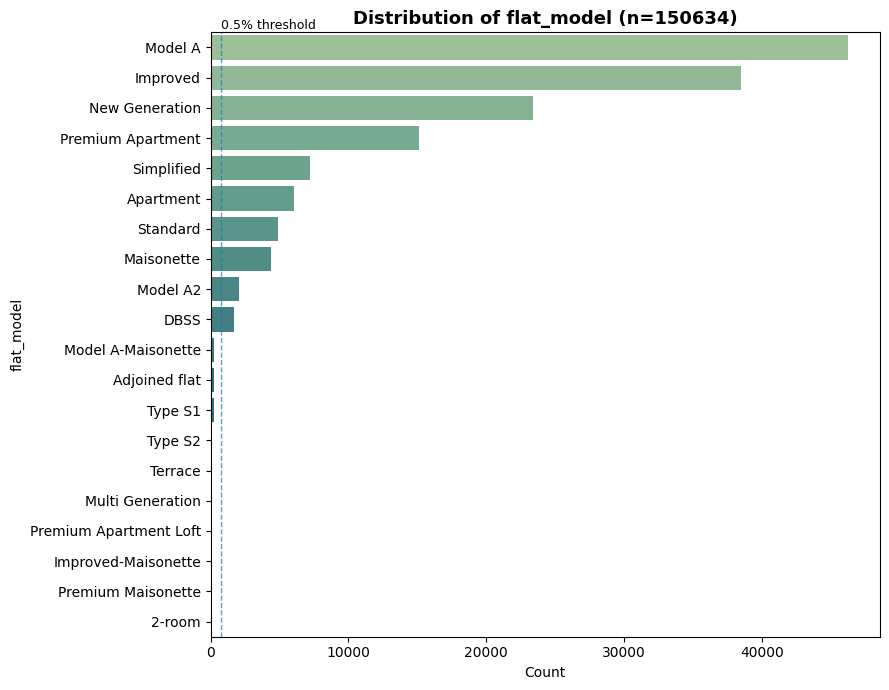


=== TOWN ===
           town  Count  Percentage
    JURONG WEST  11451       7.602
      WOODLANDS  11334       7.524
       SENGKANG  11069       7.348
       TAMPINES  10506       6.975
         YISHUN  10042       6.666
          BEDOK   9046       6.005
        PUNGGOL   7793       5.173
        HOUGANG   7555       5.015
     ANG MO KIO   6908       4.586
  CHOA CHU KANG   6343       4.211
    BUKIT MERAH   5854       3.886
  BUKIT PANJANG   5686       3.775
    BUKIT BATOK   5623       3.733
      TOA PAYOH   4817       3.198
      PASIR RIS   4763       3.162
KALLANG/WHAMPOA   4340       2.881
     QUEENSTOWN   4121       2.736
        GEYLANG   3986       2.646
      SEMBAWANG   3723       2.472
       CLEMENTI   3633       2.412
    JURONG EAST   3470       2.304
      SERANGOON   3123       2.073
         BISHAN   2871       1.906
   CENTRAL AREA   1249       0.829
  MARINE PARADE    959       0.637
    BUKIT TIMAH    369       0.245

⚠️ Rare categories (<0.5% of rows):
    

C:\Users\Serene\AppData\Local\Temp\ipykernel_18232\3061889228.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=freq_df[col], x=freq_df["Count"], orient="h", palette="crest")


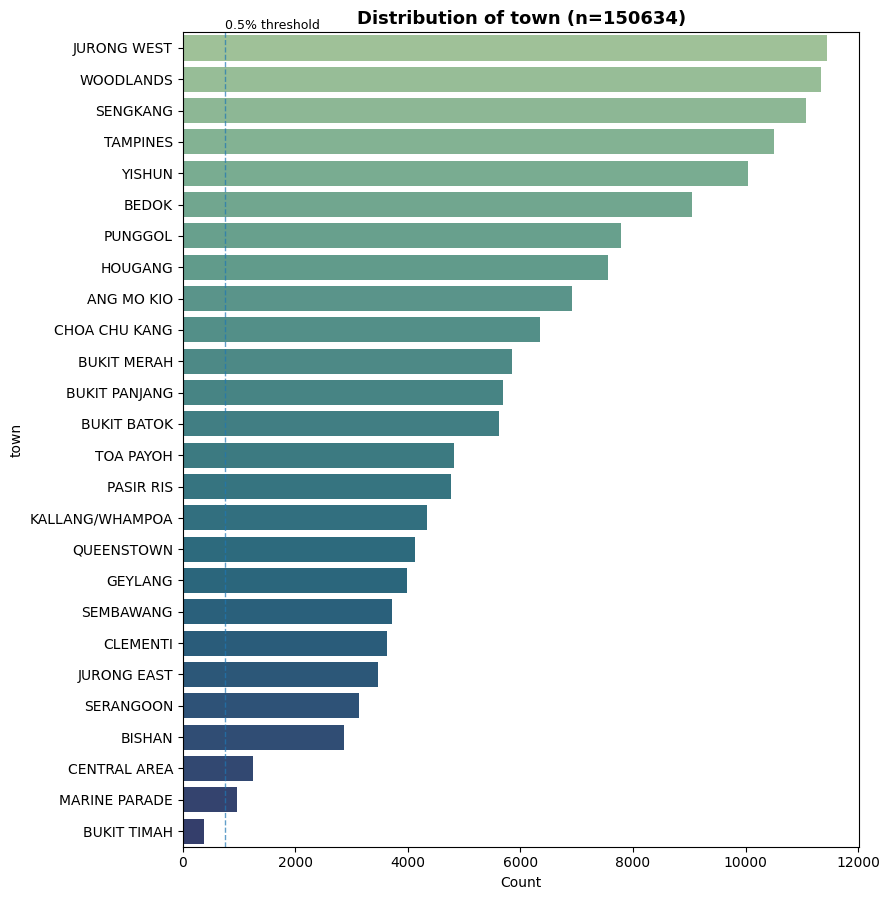


=== SEC_SCH_NAME ===
                              sec_sch_name  Count  Percentage
                Bendemeer Secondary School   3384       2.247
                 Boon Lay Secondary School   2986       1.982
              Bukit Batok Secondary School   2900       1.925
                Greendale Secondary School   2892       1.920
                Edgefield Secondary School   2744       1.822
                  Pei Hwa Secondary School   2671       1.773
                     Nan Chiau High School   2475       1.643
                  Ping Yi Secondary School   2430       1.613
                     Deyi Secondary School   2310       1.534
              Northbrooks Secondary School   2305       1.530
                  Punggol Secondary School   2235       1.484
                 Meridian Secondary School   2202       1.462
                Admiralty Secondary School   2161       1.435
                Queensway Secondary School   2153       1.429
                 Canberra Secondary School   215

C:\Users\Serene\AppData\Local\Temp\ipykernel_18232\3061889228.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=freq_df[col], x=freq_df["Count"], orient="h", palette="crest")


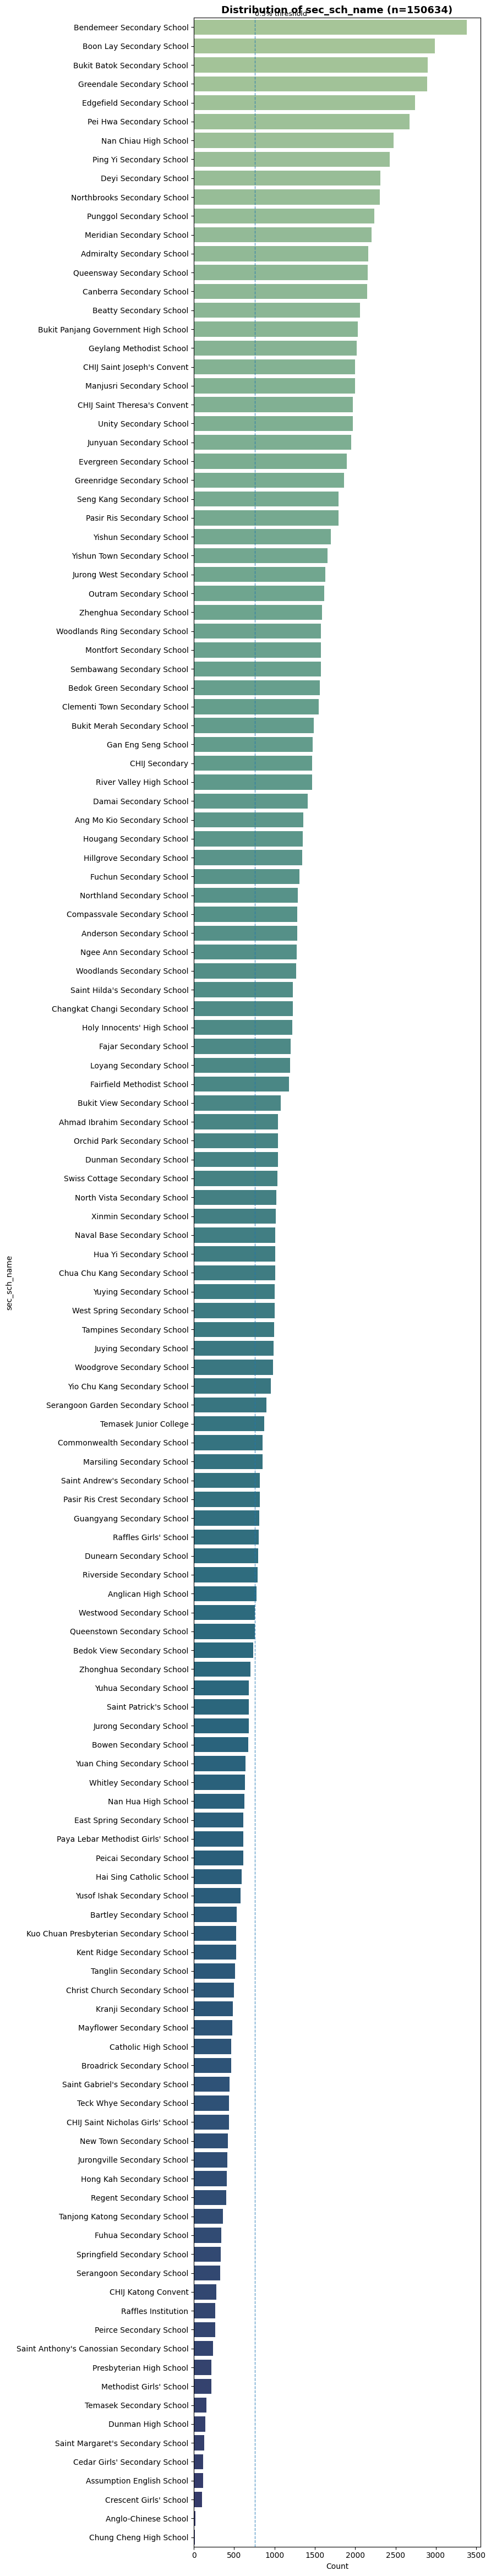

In [18]:
#summarize + plot without collapsing rares
def summarize_and_plot_cat(df: pd.DataFrame, col: str, rare_thresh: float = 0.005, top_n: int | None = None):
    n = len(df)
    s = df[col].astype("object").where(~df[col].isna(), "MISSING")

    counts = s.value_counts(dropna=False)
    if top_n:  # optional limiter for super long categories
        counts = counts.head(top_n)
    perc = (counts / n * 100).round(3)

    freq_df = (
        pd.DataFrame({col: counts.index, "Count": counts.values, "Percentage": perc.values})
        .reset_index(drop=True)
    )

    # identify but DO NOT collapse rare categories (<0.5% of rows)
    rare_df = freq_df[freq_df["Percentage"] < rare_thresh * 100]

    # --- console output ---
    print(f"\n=== {col.upper()} ===")
    print(freq_df.to_string(index=False))
    if not rare_df.empty:
        print(f"\n⚠️ Rare categories (<{rare_thresh*100:.1f}% of rows):")
        print(rare_df.to_string(index=False))
    else:
        print(f"\n✅ No categories below {rare_thresh*100:.1f}%.")

    # plot (with rare threshold marker)
    plt.figure(figsize=(9, max(4, 0.35 * len(freq_df))))
    order = counts.index
    sns.barplot(y=freq_df[col], x=freq_df["Count"], orient="h", palette="crest")
    plt.title(f"Distribution of {col} (n={n})", fontsize=13, weight="bold")
    plt.xlabel("Count"); plt.ylabel(col)

    # vertical line at 0.5% count threshold
    rare_count_line = rare_thresh * n
    plt.axvline(rare_count_line, linestyle="--", linewidth=1, alpha=0.7)
    plt.text(rare_count_line, -0.5, f"{rare_thresh*100:.1f}% threshold", ha="left", va="bottom", fontsize=9)

    plt.tight_layout()
    plt.show()

    return freq_df, rare_df

# Run for each shortlisted feature
freq_tables, rare_tables = {}, {}
for col in cat_cols_shortlist:
    freq_tables[col], rare_tables[col] = summarize_and_plot_cat(HDB, col, rare_thresh=0.005)

### *Outliers Conclusion on Shortlisted Categorical Features*

**<div style="color: purple;">1. flat_type**<br>

1-Room and Multi-Generation flats have very low count below 100, at 0.05% and 0.04% respectively. While 4-Room (40.6%), 3-Room (25.9%), and 5-Room (24.2%) dominate the resale market, collectively accounting for about 90% of transactions. 

Even though 1-Room and Multi-Generation flats are rare, they are not necessarily outliers in the statistical sense; rather, they are underrepresented categories in the dataset. 

- Decision: ✅ Keep them as-is. This preserves all data to avoid bias from removing categories. But we caveat to the agents that the model may not learn meaningful patterns for these categories due to very few examples.

**2. planning_area** <br>

Low-volume areas below 0.5% includes central luxury districts such as Rochor, Bukit Timah, Changi, Downtown Core, Tanglin, and Western Water Catchment where public housing is minimal. While planning areas within neighbourhoods and residential hubs such as Jurong West (7.6%), Woodlands (7.5%), Sengkang (7.3%), Tampines (7.0%), and Yishun (6.7%) dominate resale activity.

- Decision: ✅ Keep them as-is. These low-volume areas are not true outliers — they are valid but underrepresented categories. Predictions for low-volume areas (<0.5%) may be unstable due to limited samples or extreme pricing outliers. To stabilise the model, we will consider grouping by broader regions such as North, South, East etc. 

**3. storey_range** <br>

Floors above 27th storey or irregular ranges e.g. 28-30, 31-33 have very low count and are very rare in the dataset. While stories ranging from 4–6 (23.0%), 7–9 (20.7%), 1–3 (18.3%), and 10–12 (18.1%) dominate HDB resale activity, together making up nearly 80% of transactions. 

Even though count is low, it might typically represent newer premium developments with high stories or atypical flat types such as special DBSS. These are unlikely outliers but just underrepresented categories in the dataset. 

- Decision: ✅ Keep them as-is. They are legitimate but uncommon cases, and should be treated as such rather than removed. We will rebin them by also grouping rare high-storey ranges into a single “High/Ultra High” category to avoid sparsity issues.

**4. flat_model** <br>

Rare categories with low count includes Premium Apartment Loft, Improved-Maisonette, Premium Maisonette, 2-room which are < 0.5% of dataset. These are often niche, premium, or special flats (e.g., Loft, Maisonette, 2-Room), not errors or outliers. 

While models such as Model A and Improved dominates more than 20% as they were standard HDB designs produced in large quantities, suitable for the majority of flats across multiple towns.

- Decision: ✅ Keep them as-is. Caveat that the model might be unstable or underperform for those rare flat models.

**5. town** <br>

Bukit Timah (0.25%) stands out as the only significantly underrepresented area. This is a premium, low-density residential district with minimal public housing stock, resulting in very few HDB transactions. While large, mature estates such as Jurong West (7.6%), Woodlands (7.5%), Sengkang (7.3%), Tampines (7.0%), and Yishun (6.7%) dominate resale activity with a high proportion of flats that have reached MOP or lease maturity, resulting in frequent resale turnover.

- Decision: ✅ Keep them as-is. Similar to planning area, we might consider grouping them by regions to smooth rare categories. 

**6. sec_sch_name** <br>

Low-count schools include Assumption English, Crescent Girls, Anglo-Chinese, Chung Cheng High which are either in private/residential districts or central areas with fewer HDB flats, resulting in fewer flats being near them.

Whereas, high-count schools like Bendemeer, Boon Lay, Bukit Batok, Greendale Secondary School are located in residential hubs, so a large number of flats fall within measurable distance of these schools.

- Decision: ✅ Keep them as-is. Low-frequency schools simply reflect valid, real-world conditions: these schools are either in areas with fewer HDB flats or are selective/specialized schools. They are not outliers. </div>

### *NEXT STEPS FOR CATEGORICAL VARIABLES* <br>
<div style="color: purple;">Based on the above insights:

1. The shortlisted features with strong importance score (>0.5) are 'flat_type', 'planning_area', 'storey_range', 'town', 'flat_model' and 'sec_sch_name'.

2. Based on the outlier analysis and EDA, we will be further removing these features: <br>
- **'town'** : Broader category (e.g., “Tampines”, “Bedok”) of 'planning_area' which has higher feature importance score. To avoid overlaps, we will keep 'planning_area' and remove 'town'.
- **'flat_model'** : Several categories of 'flat_model' such as 2-room, multi-generation are a subset of 'flat_type' which has higher feature importance score. To reduce feature dimensionality and avoid overfitting, we retain 'flat_type' and remove 'flat_model' instead.
- **'sec_sch_name'** : Category % is very low, where even the highest count for Bendeemeer Secondary is only at 2.2%. Furthermore, most schools with high counts are located in planning areas with high counts which might indicate that effect of 'sec_sch_name' is partially captured by broader features such as 'planning_area'. To avoid the risk of overfitting, we will drop 'sec_sch_name'. 

3. With the 3 finalised categorical features, we will be conducting the follow up wrangling:<br>

- **'flat_type'**: keep as-is.  
- **'storey_range'**: As there are 20+ unique labels, regression will create a dummy variable for each, adding unnecessary noise. Many high floors are rare (<0.5%), making coefficients unstable or even meaningless. As such we will group into broader bins to stabilize coefficients:
   
   Low (1–6) <br>
   Mid (7–12) <br>
   High (13–18) <br>
   Very High (19-30) <br>
   Ultra High (31+) <br>

- **'planning_area'**: keep as-is. In Model 2, we will group them by regions based on URA guidelines to test the accuracy of Model 2 vs. Model 1 that uses the raw planning_area data. </div>
   

##   **Numerical Column Analysis**

### *Creation of New Features*<br>

<div style="color: purple;">As part of feature engineering, new columns for "remaining lease years", "mall outside 2km" and "hawker outside 2km" are created as based on research, these factors might likely impact HDB prices (hypothesis).</div>

In [19]:
# Create a new column for remaining lease years
HDB['remaining_lease_years'] = 99 - (2025 - HDB['lease_commence_date'])

In [20]:
# Create a new column for Mall Nearest Distance
# 1. Convert to numeric
HDB["Mall_Nearest_Distance"] = pd.to_numeric(HDB["Mall_Nearest_Distance"], errors='coerce')

# 2. Create indicator column & allocate 1 for flats with malls outside 2km, 0 for flats without malls outside 2km (boolean)
HDB["Mall_Outside_2km"] = (HDB["Mall_Nearest_Distance"] > 2000).astype(int)

In [21]:
# Create a new column for Hawker Nearest Distance
# 1. Convert to numeric
HDB["Hawker_Nearest_Distance"] = pd.to_numeric(HDB["Hawker_Nearest_Distance"], errors='coerce')

# 2. Create indicator column & allocate 1 for flats with malls outside 2km, 0 for flats without malls outside 2km (boolean)
HDB["Hawker_Outside_2km"] = (HDB["Hawker_Nearest_Distance"] > 2000).astype(int)

In [22]:
# preview the new columns
HDB.head()

Unnamed: 0      id             town  flat_type storey_range  flat_model  \
0           0   88471  KALLANG/WHAMPOA     4 ROOM     10 TO 12     Model A   
1           1  122598           BISHAN     5 ROOM     07 TO 09    Improved   
2           2  170897      BUKIT BATOK  EXECUTIVE     13 TO 15   Apartment   
3           3   86070           BISHAN     4 ROOM     01 TO 05     Model A   
4           4  153632           YISHUN     4 ROOM     01 TO 03  Simplified   

   lease_commence_date  resale_price  Tranc_Year  Tranc_Month  ...  \
0                 2006      680000.0        2016            5  ...   
1                 1987      665000.0        2012            7  ...   
2                 1997      838000.0        2013            7  ...   
3                 1992      550000.0        2012            4  ...   
4                 1987      298000.0        2017           12  ...   

   pri_sch_latitude  pri_sch_longitude sec_sch_nearest_dist  \
0          1.317659         103.882504          1138.633422   
1          1.349783         103.854529           447.894399   
2          1.345245         103.756265           180.074558   
3          1.354789         103.844934           389.515528   
4          1.416280         103.838798           312.025435   

                              sec_sch_name  cutoff_point  sec_sch_latitude  \
0                 Geylang Methodist School           224          1.317659   
1  Kuo Chuan Presbyterian Secondary School           232          1.350110   
2             Yusof Ishak Secondary School           188          1.342334   
3                     Catholic High School           253          1.354789   
4             Orchid Park Secondary School           208          1.414888   

   sec_sch_longitude remaining_lease_years  Mall_Outside_2km  \
0         103.882504                    80                 0   
1         103.854892                    61                 0   
2         103.760013                    71                 0   
3         103.844934                    66                 0   
4         103.838335                    61                 0   

   Hawker_Outside_2km  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 48 columns]

### *Outlier analysis for numerical features (Boxplot)*

<div style="color: purple;">Boxplot is plotted against individual features (x) to find extreme outliers and to decide if we're going to remove or keep. <br>

To understand the relationship trends between feature and target "resale_price" as well as find outliers for certain ranges of x, boxplot is also plotted for x vs. y for certain features (x) which are non-continuous. </div>

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

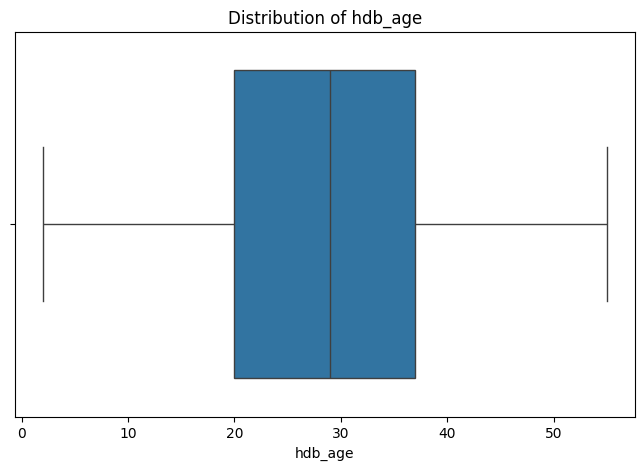

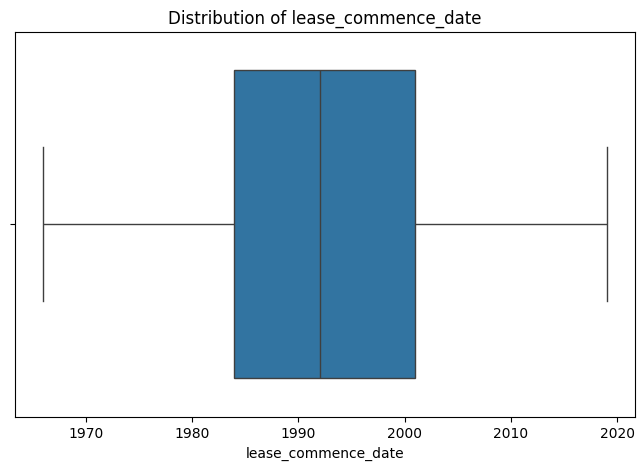

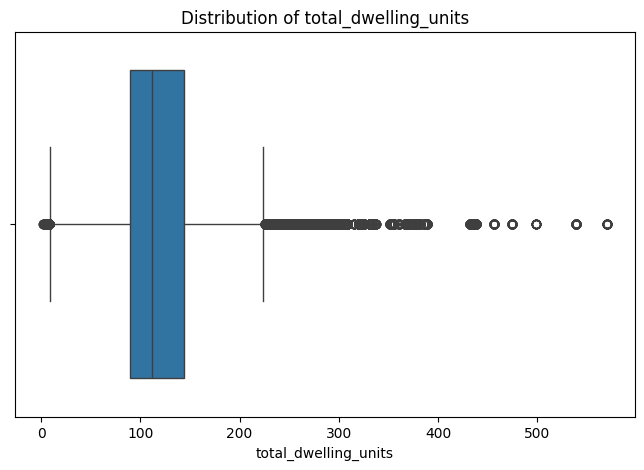

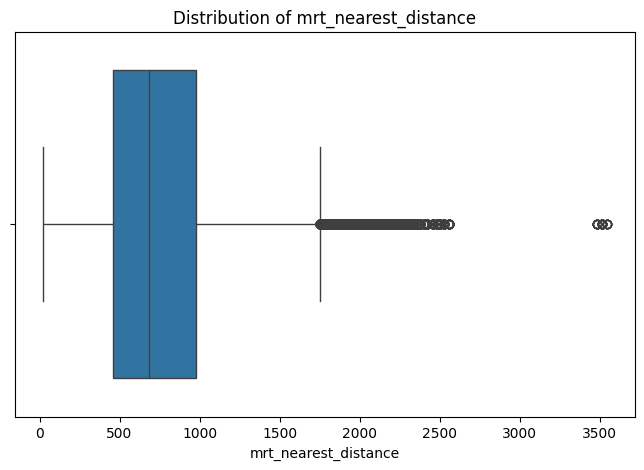

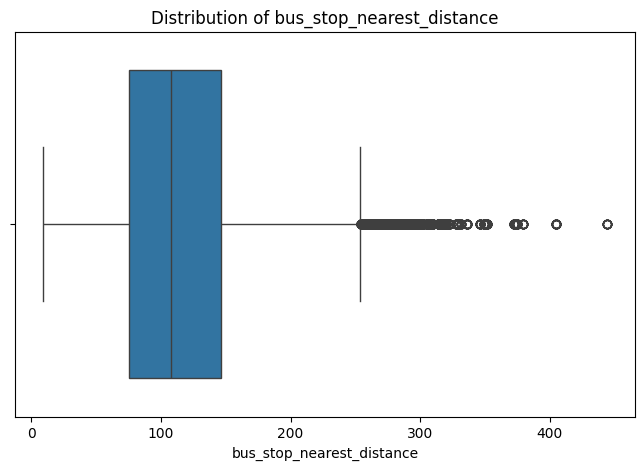

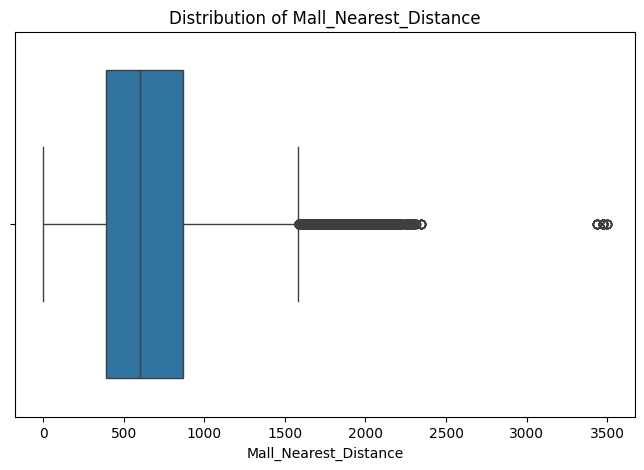

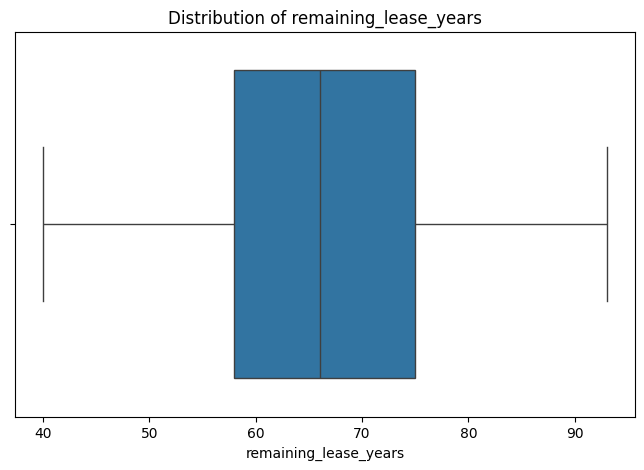

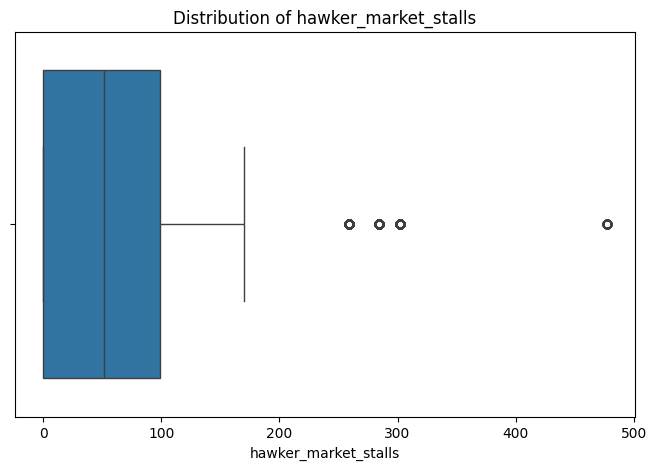

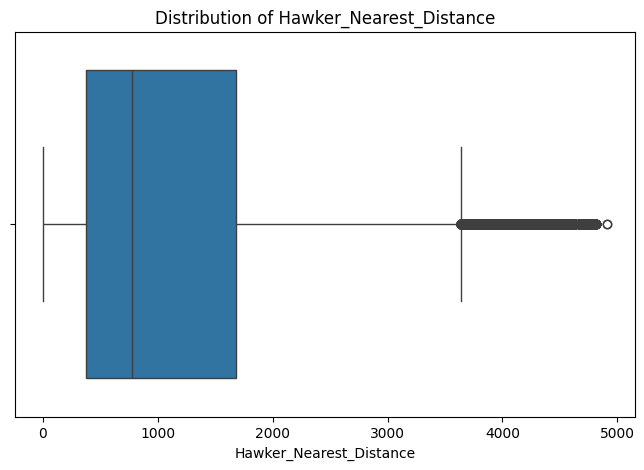

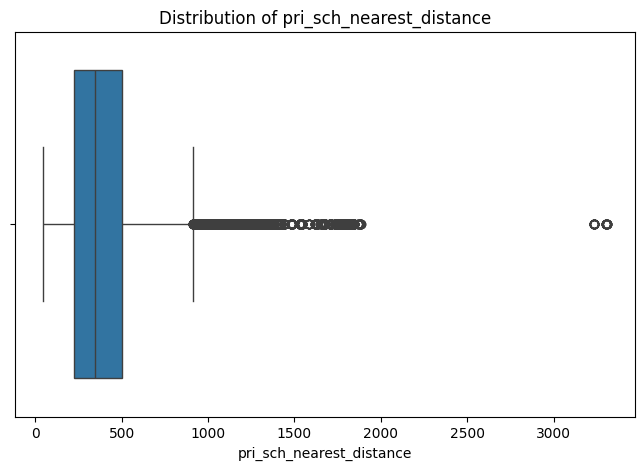

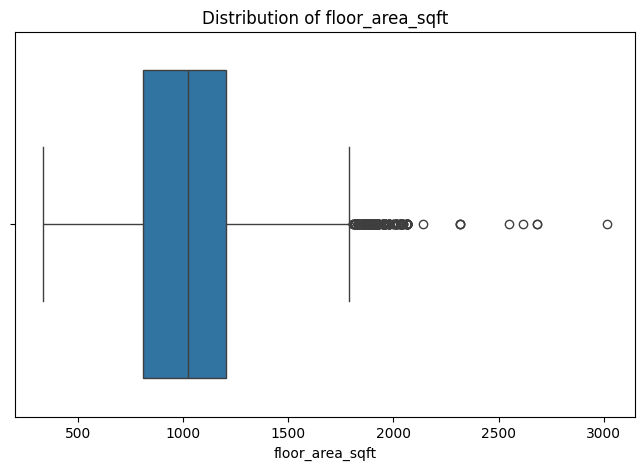

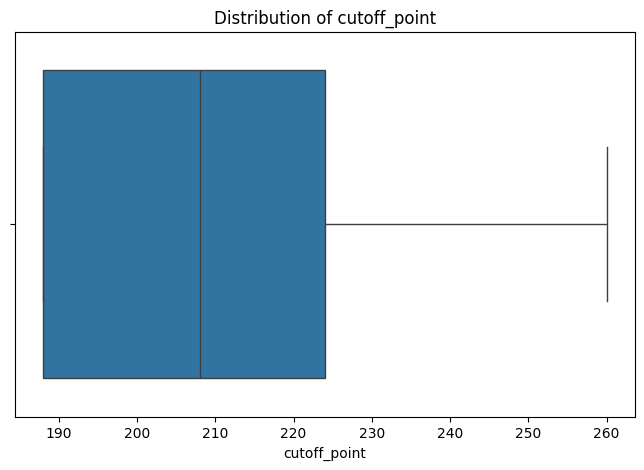

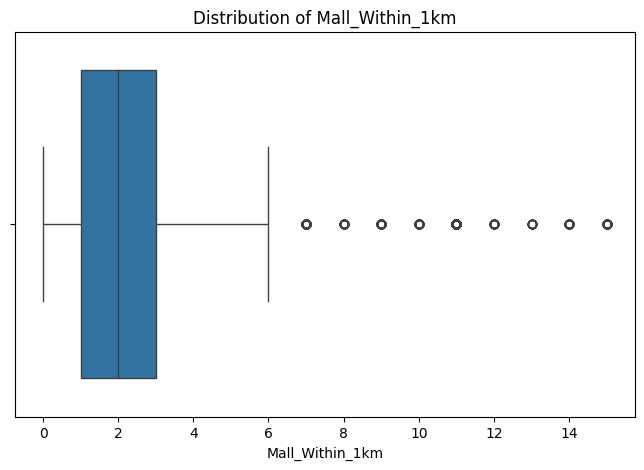

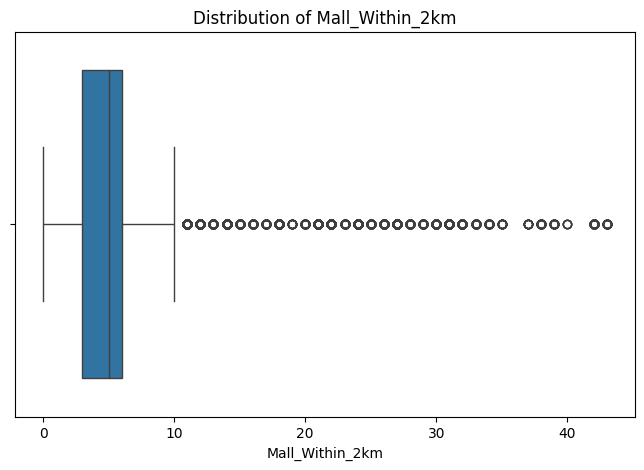

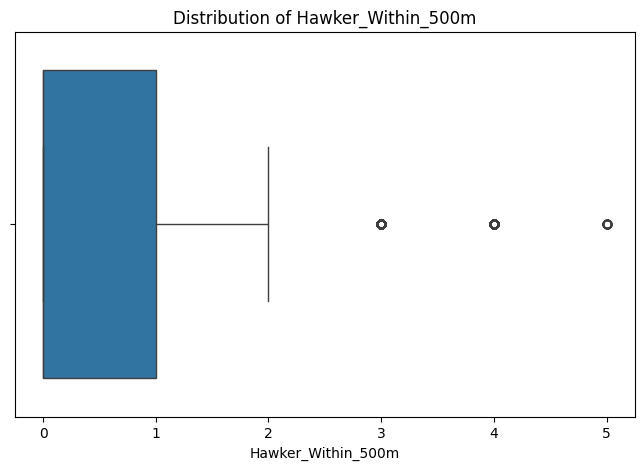

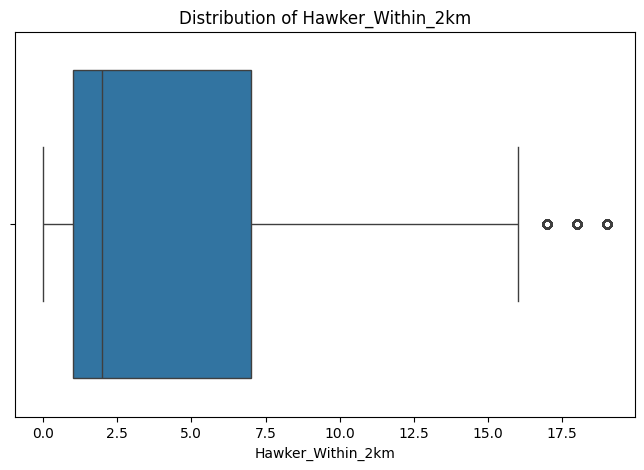

In [24]:
# Define all numerical features
numerical_features = ["hdb_age",
                      "lease_commence_date",
                      "total_dwelling_units",
                      "mrt_nearest_distance",
                      "bus_stop_nearest_distance",
                      "Mall_Nearest_Distance",
                      "remaining_lease_years",
                      "hawker_market_stalls",
                      "Hawker_Nearest_Distance",
                      "pri_sch_nearest_distance",
                      "sec_sch_nearest_dist",
                      "floor_area_sqft",
                      "cutoff_point",
                      "Mall_Within_500m",
                      "Mall_Within_1km",
                      "Mall_Within_2km",
                      "Hawker_Within_500m", 
                      "Hawker_Within_1km",
                      "Hawker_Within_2km",
                      "resale_price"]

# Loop through each feature and create a boxplot
for feature in numerical_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=HDB[feature])
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.show()

### *Insights on Numerical Features Distribution*<br>

<div style="color: purple;">All outliers (except cutoff_point with no outliers) are kept as they are actual, realistic values and are not data errors. However, some features will require winsorize if selected (e.g. cap at a certain value). As Hawker_Outside_2km and Mall_Outside_2km are boolean, the boxplot is not showing up correctly. We will plot them against target variable y (retail_price) instead. <br>

1. hdb_age
- Median: ~29 years
- Outliers: Few extreme points on both lower and upper ends (young/new and very old flats).
- Decision: ✅ Keep outliers. These represent genuine age variations between newly built and older estates and are meaningful for understanding resale price trends.

2. lease_commence_date
- Median: ~1992
- Outliers: Early leases from the 1960s and very recent ones (post-2015).
- Decision: ✅ Keep outliers. The variation reflects the natural distribution of lease periods across different HDB generations.

3. total_dwelling_units
- Median: ~112 units
- Outliers: High outliers beyond 400–500 units, representing large estates.
- Decision: ✅ Keep but monitor. These are valid but may be standardized (e.g., capped) in modeling if they cause skewed relationships.

4. mrt_nearest_distance
- Median: ~680m
- Outliers: Some estates >3,000m from MRT.
- Decision: ✅ Keep but winsorize (cap at 99th percentile) if model performance is sensitive — these reflect edge locations or non-MRT-served areas.

5. bus_stop_nearest_distance
- Median: ~108m
- Outliers: Sparse high values >400 m.
- Decision: ✅ Keep outliers. Distances slightly above 400m may indicate rare cases (industrial or low-density zones), but they’re realistic.

6. Mall_Nearest_Distance
- Median: ~510 m
- Outliers: Distances beyond ~1 km.
- Decision: ✅ Keep but consider normalization. They reflect estates far from malls (e.g., suburban or fringe areas), relevant to accessibility modeling.

7. Mall_Within_500m
- Median: ~1 (few malls nearby)
- Outliers: Minor counts >3–6.
- Decision: ✅ Keep outliers. These outliers highlight dense urban regions (e.g. Central area) and are valuable for modeling location advantage.

8. Mall_Within_1km
- Median: ~2 malls
- Outliers: Higher values beyond 10–15.
- Decision: ✅ Keep outliers. Indicates high retail concentration; useful for explaining price variation.

9. Mall_Within_2km
- Median: ~5 malls
- Outliers: Values >30 malls.
- Decision: ✅ Keep but log-transform. The right skew could be normalized (log scale) for regression or machine learning models.

10. remaining_lease_years
- Median: ~66 years
- Outliers: Minimal — range ~39–95 years.
- Decision: ✅ Keep all. The spread is realistic and represents the full HDB lease cycle.

11. hawker_market_stalls
- Median: 74
- Outliers: 4 outliers with values above upper bound 
- Decision: ✅ Keep the outliers as there are actual hawker centres with many stalls especially in Central Area

12. Hawker_Nearest_Distance
- Median: 778m
- Outliers: Many outliers with values above upper bound
- Decision: ✅ Keep the outliers as there are indeed flats where the nearest hawker is very far away.

13. pri_sch_nearest_distance
- Median: 349m
- Outliers: Many outliers with values above upper bound
- Decision: ✅ Keep the outliers as there are indeed flats where the nearest pri sch is very far away.

14. sec_sch_nearest_dist
- Median: 447m
- Outliers: Many outliers with values above upper bound
- Decision: ✅ Keep the outliers as there are indeed flats where the nearest sec sch is very far away.

15. floor_area_sqft
- Median: 1022 sqft
- Outliers: Many outliers above upper bound of 1,786 sqft.
- Decision: ✅ Keep the outliers as there are really bigger houses like Terrace which can go up to 3500 square feet.

16. cutoff_point
- Median: 208
- No outliers

19. Hawker_Within_500m
- Median: 0
- Outliers: 3 outliers up to 5
- Decision: ✅ Keep the outliers as 5 hawker centres within 500m seems reasonable especially for Central Area concentrated with hawker centres.

20. Hawker_Within_1km
- Median: 1
- Outliers: 4 outliers up to 9
- Decision: ✅ Keep the outliers as 9 hawker centres within 1km seems reasonable especially for Central Area concentrated with hawker centres.

21. Hawker_Within_2km
- Median: 2
- Outliers: 3 outliers up to 19
- Decision: ✅ Keep the outliers as 19 hawker centres within 2km seems reasonable especially for Central Area concentrated with hawker centres.

22. resale_price
- Median: $420k
- Outliers: Many outliers above upper bound of $779k, with houses up to $1.248 million
- Decision: ✅ Keep the outliers as flats selling up to $1.5 million exist such as in Executive or Maisonette.</div>


In [25]:
# "Hawker_Outside_2km" and "Mall_Outside_2km" plotted to relate against target y = resale_price
numerical_features = [
    "Hawker_Outside_2km", 
    "Mall_Outside_2km"]

# Loop through each feature and create a boxplot with y= "resale_price"
for feature in numerical_features:
    fig = px.box(HDB, x=feature, y="resale_price", title=f"Distribution of {feature}")
    fig.show()

<div style="color: purple;">Both "Hawker_Outside_2km" and "Mall_Outside_2km" shows similar median values with more outliers for flats with malls outside 2km. The above boxplots tell us that there seem to be a weak correlation between resale price and number of malls + hawkers outside 2km.</div>

### *Correlation Analysis*

<div style="color: purple;">Correlation analysis is performed to identify features most correlated to resale_price and guide feature selection for modeling.

Approach:
- Pairplot – visualize feature relationships.
- Correlation matrix – compute Pearson correlations.
- Heatmap – display correlation strength and direction.</div>

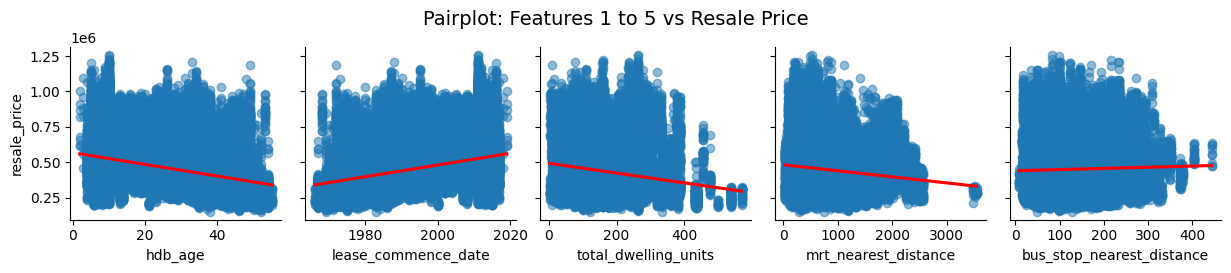

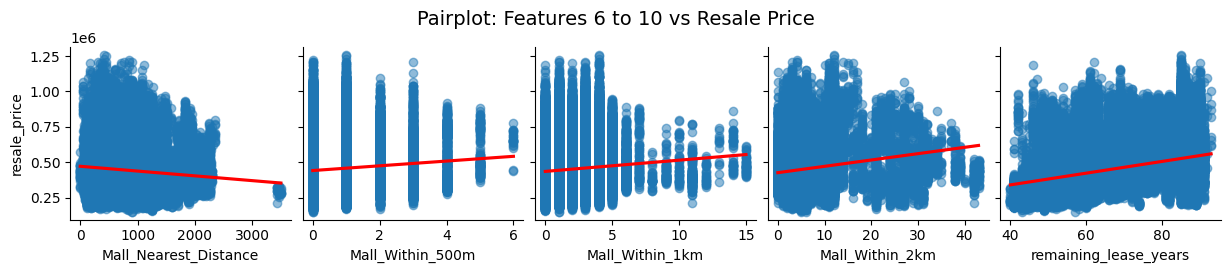

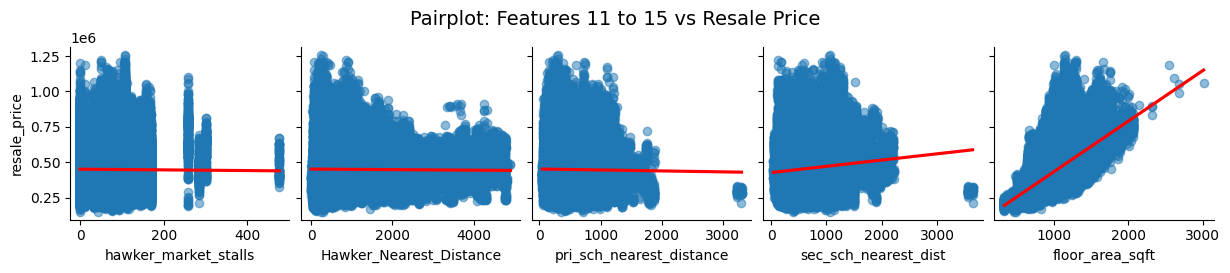

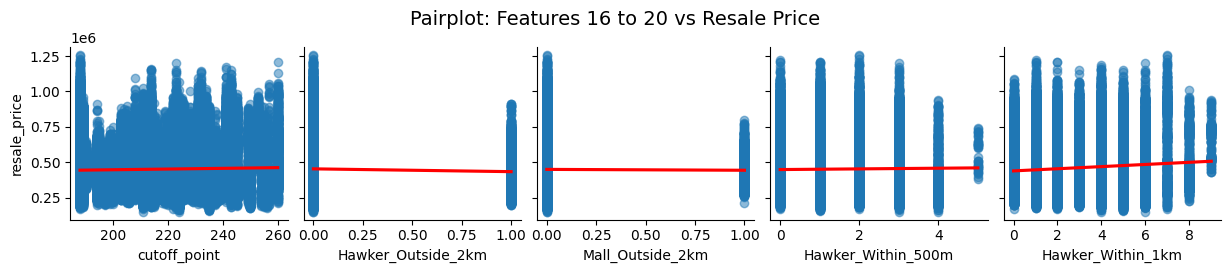

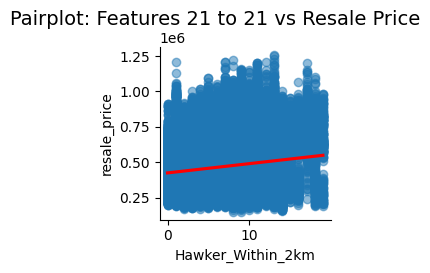

In [26]:
# creation of pairplots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# listing all numerical features
numerical_features = ["hdb_age",
                      "lease_commence_date",
                      "total_dwelling_units",
                      "mrt_nearest_distance",
                      "bus_stop_nearest_distance",
                      "Mall_Nearest_Distance",
                      "Mall_Within_500m",
                      "Mall_Within_1km",
                      "Mall_Within_2km",
                      "remaining_lease_years",
                      "hawker_market_stalls",
                      "Hawker_Nearest_Distance",
                      "pri_sch_nearest_distance",
                      "sec_sch_nearest_dist",
                      "floor_area_sqft",
                      "cutoff_point",
                      "Hawker_Outside_2km", 
                      "Mall_Outside_2km",
                      "Hawker_Within_500m", 
                      "Hawker_Within_1km",
                      "Hawker_Within_2km"]

chunk_size = 5  # number of features per figure

# Loop through features in chunks
for i in range(0, len(numerical_features), chunk_size):
    chunk = numerical_features[i:i+chunk_size]
    
    # Create pairplot for this chunk
    g = sns.pairplot(HDB, x_vars=chunk, y_vars="resale_price", 
                     kind="reg", diag_kind=None,
                     plot_kws={'line_kws': {'color': 'red'}, 
                               'scatter_kws': {'alpha': 0.5}})
    
    # Add title
    g.fig.suptitle(f"Pairplot: Features {i+1} to {i+len(chunk)} vs Resale Price", 
                   y=1.05, fontsize=14)
    
    plt.show()

resale_price                 1.000000
floor_area_sqft              0.654120
lease_commence_date          0.350337
remaining_lease_years        0.350337
Hawker_Within_2km            0.183168
Mall_Within_2km              0.108648
sec_sch_nearest_dist         0.095339
Hawker_Within_1km            0.090516
Mall_Within_500m             0.085151
Mall_Within_1km              0.078815
cutoff_point                 0.034572
bus_stop_nearest_distance    0.031940
Hawker_Within_500m           0.012637
Mall_Outside_2km            -0.003688
hawker_market_stalls        -0.009378
pri_sch_nearest_distance    -0.011004
Hawker_Nearest_Distance     -0.014537
Hawker_Outside_2km          -0.054787
Mall_Nearest_Distance       -0.087096
mrt_nearest_distance        -0.128222
total_dwelling_units        -0.140725
hdb_age                     -0.350337
Name: resale_price, dtype: float64


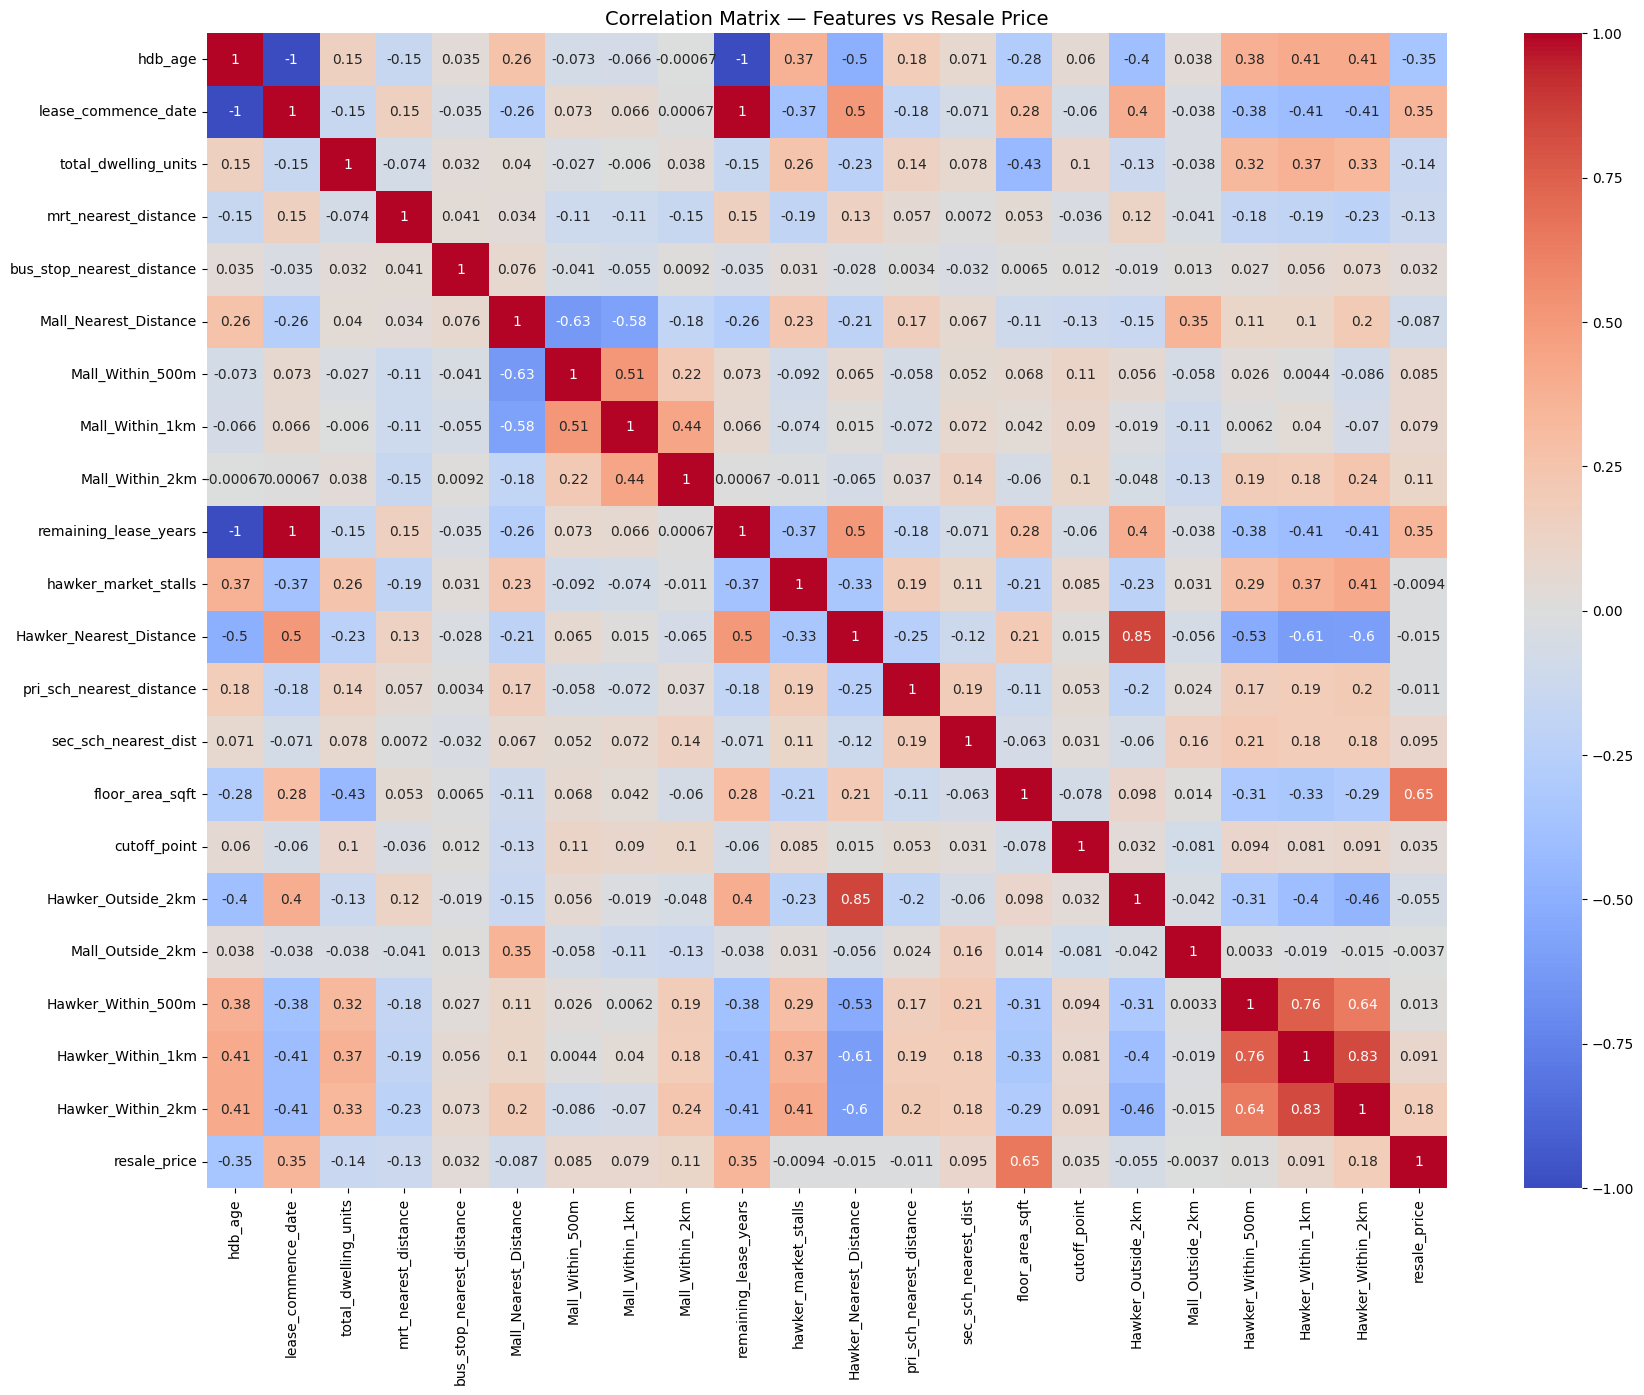

In [27]:
# Creation of Correlation Matrix & Heatmap
# Define numerical features
numerical_features = ["hdb_age",
                      "lease_commence_date",
                      "total_dwelling_units",
                      "mrt_nearest_distance",
                      "bus_stop_nearest_distance",
                      "Mall_Nearest_Distance",
                      "Mall_Within_500m",
                      "Mall_Within_1km",
                      "Mall_Within_2km",
                      "remaining_lease_years",
                      "hawker_market_stalls",
                      "Hawker_Nearest_Distance",
                      "pri_sch_nearest_distance",
                      "sec_sch_nearest_dist",
                      "floor_area_sqft",
                      "cutoff_point",
                      "Hawker_Outside_2km", 
                      "Mall_Outside_2km",
                      "Hawker_Within_500m", 
                      "Hawker_Within_1km",
                      "Hawker_Within_2km"]

# Add in target variable y (features + target)
corr_df = HDB[numerical_features + ['resale_price']]

# Compute correlation matrix (Pearson correlation)
corr_matrix = corr_df.corr()

# Display the correlation matrix numerically 
print(corr_matrix['resale_price'].sort_values(ascending=False))

# Plot the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix — Features vs Resale Price", fontsize=14)
plt.show()

<div style="color: purple;">With the above pairplots and correlation matrix, we have grouped the features into strong, weak and no correlation (positive & negative) as follows: <br>

**Negative Correlation:** <br>
Negative correlation means that when the value of the feature (e.g. hdb_age) increases, the resale_price drops.

→ Strong (< -0.6): None <br>

→ Weak (-0.3 to -0.6): `hdb_age` <br>

→ None/Negligent (0 to -0.3): `total_dwelling_units`, `mrt_nearest_distance`, `Mall_Nearest_Distance`, `Mall_Outside_2km`, `hawker_market_stalls`, `pri_sch_nearest_distance`, `Hawker_Nearest_Distance`, `Hawker_Outside_2km`

**Positive Correlation:** <br>
Positive correlation means that when the value of the feature (e.g. floor_area_sqft) increases, the resale_price increases as well.

→ Strong (> 0.6): `floor_area_sqft` <br>

→ Weak (0.3 to 0.6): `lease_commence_date`, `remaining_lease_years` <br>

→ None/Negligent (0 to 0.3): `Hawker_Within_2km`, `Mall_Within_2km`, `sec_sch_nearest_dist`, `Hawker_Within_1km`, `Mall_Within_500m`, `Mall_Within_1km`, `cutoff_point`, `bus_stop_nearest_distance`, `Hawker_Within_500m` </div>


### *NEXT STEPS FOR NUMERICAL VARIABLES* <br>
<div style="color: purple;">Based on the correlation analysis above: <br>

1. The shortlisted features with correlation are: floor_area_sqft, hdb_age, lease_commence_date and remaining_lease_years. 

2. As hdb_age, lease_commence_date and remaining_lease_years are perfectly correlated (+1 or -1) with each other, to avoid multicollinearity, we will only select "hdb_age" as part of feature matrix X.

3. We've also observed that correlation between "hdb_age" and "floor_area_sqft" is at -0.28 which is negligent, thus both of these features can be used together and they will not be the risk of multicollinearity. 

4. There will not be any extra data wrangling done for both of the 2 finalised numerical features - hdb_age and floor_area_sqft. </div>

##   **FINAL SELECTED FEATURES FOR MODELLING**

<div style="color: purple;">
1. hdb_age<br>
2. floor_area_sqft<br>
3. planning_area<br>
4. flat_type<br>
5. storey_range</div>